## Multiple Linear Regression

### Bike Sharing Case Study¶

 

#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2.How well those variables describe the bike demands

### Step 1: Reading and Understanding the Data
#### Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd


In [3]:
Bike_df = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspects of the  dataframe

In [5]:
Bike_df.shape

(730, 16)

In [6]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
Bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
Bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
###Checking null values
Bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Dropping unnecessary columns

In [10]:
# As we can see Instant is an index column so we can drop it.
Bike_df.drop(['instant'], axis=1, inplace=True)
#we know that casual+registered=cnt so we can drop these columns.
Bike_df.drop(['casual','registered'],axis=1,inplace=True)

In [11]:
# AS we can see column dteday and yr month are having same data so we can drop dteday.
Bike_df.drop(['dteday'], axis=1, inplace=True)

In [12]:
Bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# renaming columns for better understanding
Bike_df.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

In [14]:
# mapping varible proper names for better visibilty
Bike_df['Season'] = Bike_df['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
Bike_df['Month'] = Bike_df['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
Bike_df['weekday'] = Bike_df['weekday'].map({0:'Sun',1:'Mon',2:'Tues',3:'Wed',4:'Thurs',5:'Fri',6:'Sat'})
Bike_df['Weather'] = Bike_df['Weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})

In [15]:
Bike_df.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,0,Jan,0,Mon,1,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,1,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   Weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

In [18]:
Bike_df.columns

Index(['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'Weather', 'temp', 'atemp', 'Humidity', 'windspeed', 'Count'],
      dtype='object')

In [19]:
# Segregation of columns to categorical and numerical type
cat_column = ["Season","Year","Month","holiday","weekday","workingday","Weather"]
num_column = ["temp","atemp","Hum","windspeed"]

<Figure size 1440x864 with 0 Axes>

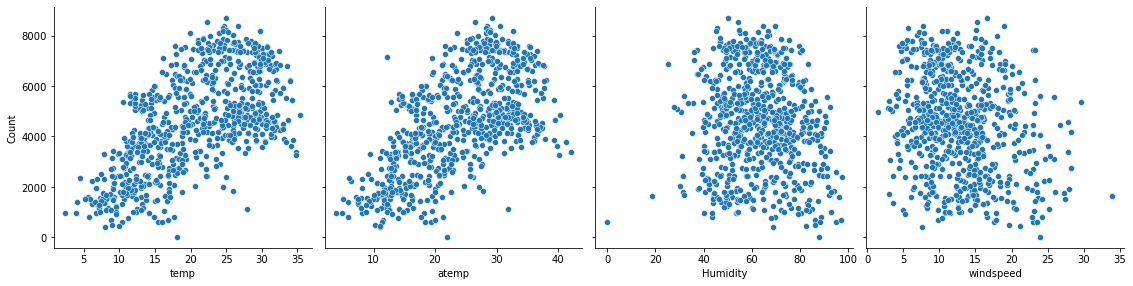

In [20]:
plt.figure(figsize=(20, 12))
sns.pairplot(Bike_df, x_vars=['temp','atemp','Humidity','windspeed'], y_vars='Count',size=4,kind='scatter')
plt.show()

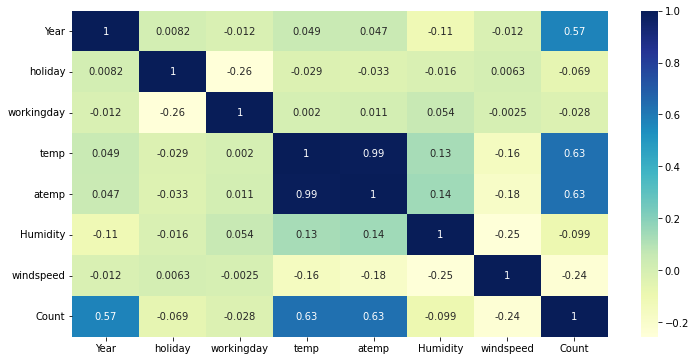

In [21]:
#plotiing through heatmap for checking corelation
plt.figure(figsize = (12, 6))
sns.heatmap(Bike_df.corr(), annot = True, cmap="YlGnBu") 
plt.show()

- Inferences:
- The coorelation between temp and atemp is very high 0.99.
- The coreation between Count with year and temp also looks good.

#### Visualising Categorical Variables
#### As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

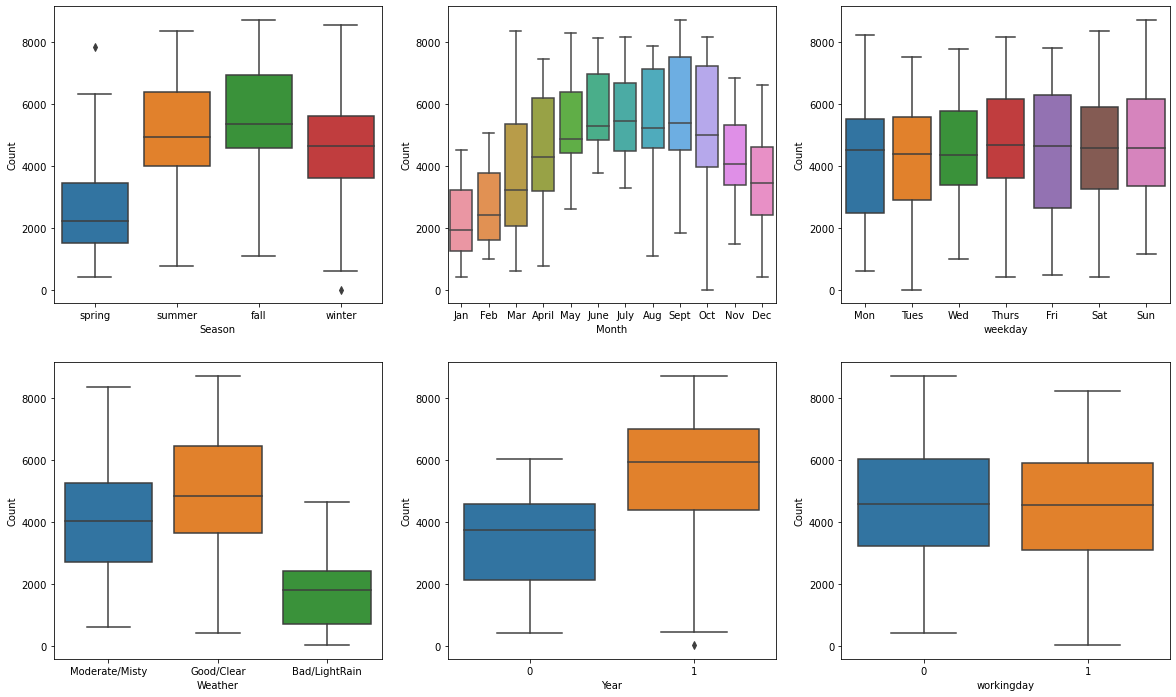

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Season', y = 'Count', data = Bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Year', y = 'Count', data = Bike_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'Month', y = 'Count', data = Bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'Count', data = Bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'Count', data = Bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Weather', y = 'Count', data = Bike_df)
plt.show()

## Step 3: Data Preparation

### Dummy variable

In [23]:
# Get the dummy variables for categoriacl variable.

Season_condition=pd.get_dummies(Bike_df['Season'],drop_first=True)
Month=pd.get_dummies(Bike_df['Month'],drop_first=True)
Day_of_week=pd.get_dummies(Bike_df['weekday'],drop_first=True)
Weather_condition=pd.get_dummies(Bike_df['Weather'],drop_first=True)

In [24]:
Bike_df=pd.concat([Bike_df,Season_condition],axis=1)
Bike_df=pd.concat([Bike_df,Month],axis=1)
Bike_df=pd.concat([Bike_df,Day_of_week],axis=1)
Bike_df=pd.concat([Bike_df,Weather_condition],axis=1)

Bike_df.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
0,spring,0,Jan,0,Mon,1,Moderate/Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tues,1,Moderate/Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Good/Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,1,0
3,spring,0,Jan,0,Thurs,1,Good/Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,1,0
4,spring,0,Jan,0,Fri,1,Good/Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [25]:
# dropping columns from which dummy varibles were created
Bike_df.drop(['Season', 'Month','weekday', 'Weather'], axis=1, inplace=True)

In [26]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   Humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   Count           730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  July            730 non-null    uint8  
 16  June            730 non-null    uint8  
 17  Mar             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train_bike, df_test_bike = train_test_split(Bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
#Checking the shape
print(df_train_bike.shape)
print(df_test_bike.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

We will use MinMax scaling.

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp', 'Humidity', 'windspeed', 'Count']

df_train_bike[num_vars] = scaler.fit_transform(df_train_bike[num_vars])
df_train_bike[num_vars].head()

,temp,atemp,Humidity,windspeed,Count
653,0.509887,0.501133,0.575354,0.300794,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973


In [32]:
df_train_bike.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Good/Clear,Moderate/Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


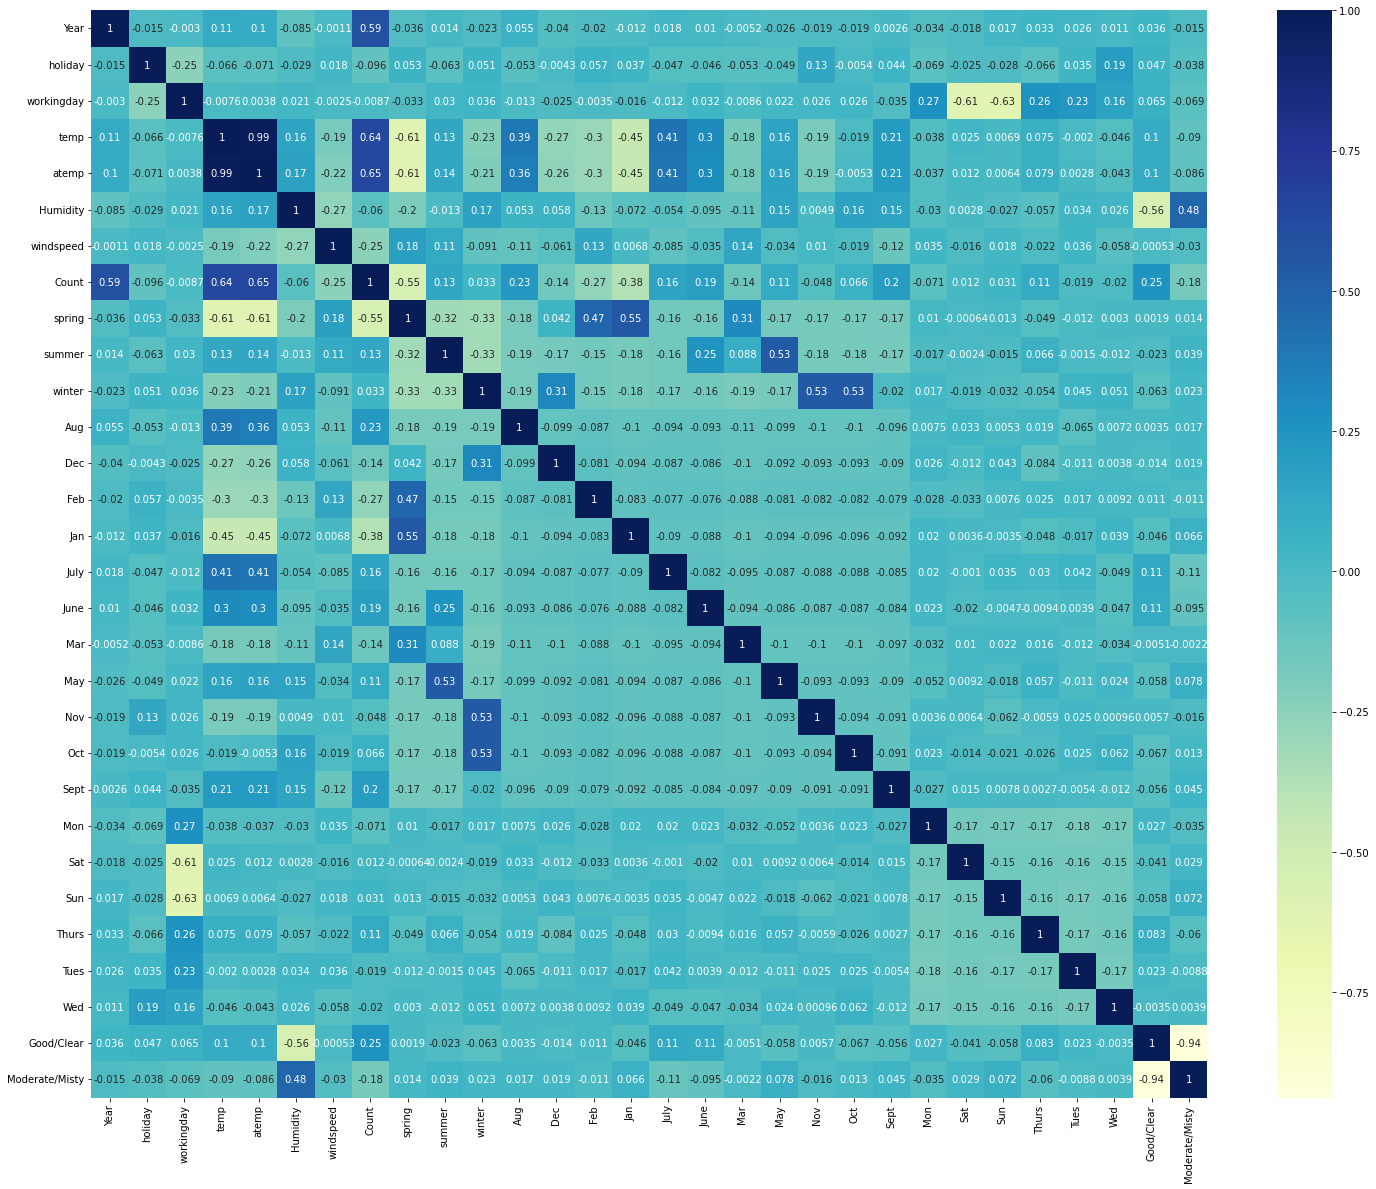

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = [25,20])
sns.heatmap(df_train_bike.corr(),annot =True, cmap= 'YlGnBu')
plt.show()

- As you might have noticed, `atemp` seems to the correlated to `Count` the most. Let's see a pairplot for `atemp` vs `Count`.

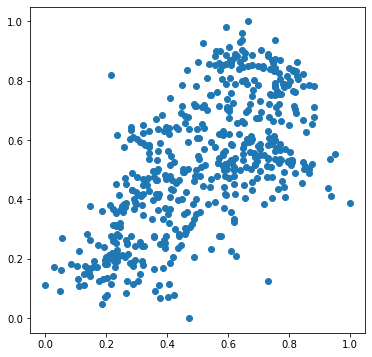

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_train_bike.atemp, df_train_bike.Count)
plt.show()

### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train_bike.pop('Count')
X_train = df_train_bike

In [36]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


## Step 5
## Building our model

### RFE
Recursive feature elimination

In [37]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', False, 2),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 2),
 ('June', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sept', True, 1),
 ('Mon', False, 2),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thurs', False, 2),
 ('Tues', False, 2),
 ('Wed', False, 2),
 ('Good/Clear', True, 1),
 ('Moderate/Misty', True, 1)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'winter', 'Jan', 'Sept', 'Sat', 'Sun', 'Good/Clear',
       'Moderate/Misty'],
      dtype='object')

In [41]:
X_train.columns[~rfe.support_]

Index(['spring', 'summer', 'Aug', 'Dec', 'Feb', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Mon', 'Thurs', 'Tues', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Model 1

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [45]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     161.8
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.93e-174
Time:                        23:07:46   Log-Likelihood:                 476.78
No. Observations:                 510   AIC:                            -923.6
Df Residuals:                     495   BIC:                            -860.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0538      0.089      0.

In [46]:
# Calculate the VIFs for the  model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

`Sun` is insignificant ; can be dropped

In [47]:
X_train_new = X_train_rfe.drop(["Sun"], axis = 1)

Rebuilding the model without `Sun`

### Model 2

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_new)

In [49]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

In [50]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.6
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.53e-175
Time:                        23:07:46   Log-Likelihood:                 476.72
No. Observations:                 510   AIC:                            -925.4
Df Residuals:                     496   BIC:                            -866.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0268      0.047      0.

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,123.04
5,atemp,52.07
4,temp,51.84
12,Good/Clear,10.21
13,Moderate/Misty,8.86
6,Humidity,1.88
3,workingday,1.81
11,Sat,1.69
9,Jan,1.44
8,winter,1.30


`Sat` is insignificant ; can be dropped

In [52]:
X_train_new = X_train_new.drop(["Sat"], axis = 1)

### Model 3

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm3 = sm.add_constant(X_train_new)

In [54]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

In [55]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     189.5
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.10e-176
Time:                        23:07:47   Log-Likelihood:                 476.70
No. Observations:                 510   AIC:                            -927.4
Df Residuals:                     497   BIC:                            -872.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0252      0.046      0.

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,118.61
5,atemp,51.87
4,temp,51.63
11,Good/Clear,10.20
12,Moderate/Misty,8.84
6,Humidity,1.88
9,Jan,1.44
8,winter,1.30
7,windspeed,1.22
2,holiday,1.09


`Workingday` is insignificant ; can be dropped

In [57]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### Model 4

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          3.28e-177
Time:                        23:07:47   Log-Likelihood:                 475.18
No. Observations:                 510   AIC:                            -926.4
Df Residuals:                     498   BIC:                            -875.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0171      0.046      0.

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,117.40
4,atemp,51.66
3,temp,51.38
10,Good/Clear,10.18
11,Moderate/Misty,8.84
5,Humidity,1.87
8,Jan,1.44
7,winter,1.30
6,windspeed,1.22
9,Sept,1.07


`atemp` is insignificant ; can be dropped

In [60]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)

### Model 5

In [61]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm5 = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.4
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.72e-178
Time:                        23:07:47   Log-Likelihood:                 474.93
No. Observations:                 510   AIC:                            -927.9
Df Residuals:                     499   BIC:                            -881.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0171      0.046      0.

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,117.40
9,Good/Clear,10.11
10,Moderate/Misty,8.80
4,Humidity,1.86
3,temp,1.71
7,Jan,1.44
6,winter,1.29
5,windspeed,1.18
8,Sept,1.07
1,Year,1.03


In [63]:
# Dropping Good/Clear since showing very high VIF values (considering VIF less than 5 good VIF Value criteria)
X_train_new = X_train_new.drop(["Good/Clear"], axis = 1)

### Model 6

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm6 = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          7.16e-164
Time:                        23:07:47   Log-Likelihood:                 438.09
No. Observations:                 510   AIC:                            -856.2
Df Residuals:                     500   BIC:                            -813.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3356      0.031     10.

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.63
3,temp,1.69
4,Humidity,1.58
7,Jan,1.43
9,Moderate/Misty,1.39
6,winter,1.29
5,windspeed,1.14
8,Sept,1.07
1,Year,1.03
2,holiday,1.01


`Moderate/Misty` is insignificant with high PI Value ; can be dropped

In [66]:
X_train_new = X_train_new.drop(["Moderate/Misty"], axis = 1)

### Model 7

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm7 = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     235.9
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.65e-164
Time:                        23:07:47   Log-Likelihood:                 436.76
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     501   BIC:                            -817.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3477      0.030     11.558      0.0

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,42.94
3,temp,1.63
7,Jan,1.43
6,winter,1.28
4,Humidity,1.16
5,windspeed,1.14
8,Sept,1.07
1,Year,1.03
2,holiday,1.01


In [69]:
X_train_new.columns

Index(['const', 'Year', 'holiday', 'temp', 'Humidity', 'windspeed', 'winter',
       'Jan', 'Sept'],
      dtype='object')

In [70]:
X_train_new = X_train_new.drop(['const'], axis=1)

- We can cosider the model lm7, as it is having very low multicolinearity between the predictors and the p-values for all the predictors is significant

### Residual Analysis of the train data
- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
y_train_pred = lm7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

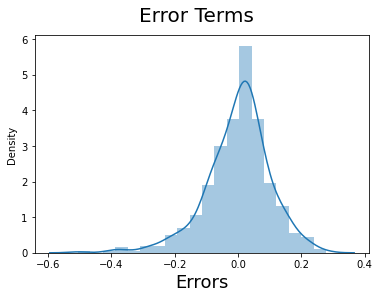

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

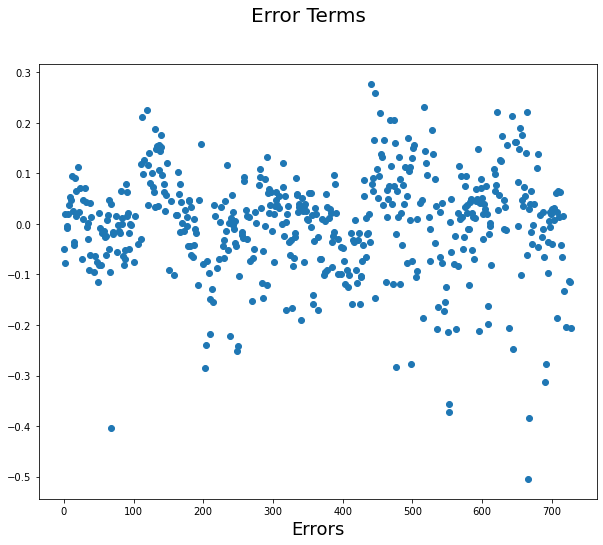

In [73]:
#plotting a scatterplot with the residuals to check the randomness
fig = plt.figure(figsize=(10,8)) #setting the figure size
plt.scatter(y_train.index,(y_train-y_train_pred)) #Plotting scatter plot with the residuals
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)   

###  Homoscedasticity

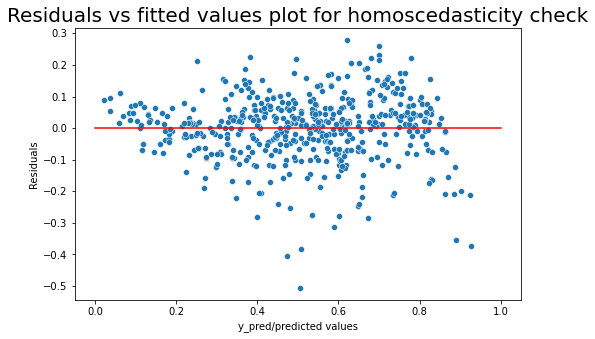

In [76]:
# Check for Homoscedasticity

plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,y_train - y_train_pred)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

### Making Predictions
- Applying the scaling on the test sets

In [77]:
num_vars = ["temp","atemp", "Humidity", "windspeed" ,"Count"]
df_test_bike[num_vars] = scaler.transform(df_test_bike[num_vars])

#### Dividing into X_test and y_test

In [78]:
y_test = df_test_bike.pop('Count')
X_test = df_test_bike

In [79]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [80]:
# Making predictions
y_pred = lm7.predict(X_test_new)

In [81]:
# checking the r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred) 
r2

0.7762402982598577

### Step 8 : Model Evaluation

Text(0, 0.5, 'y_pred')

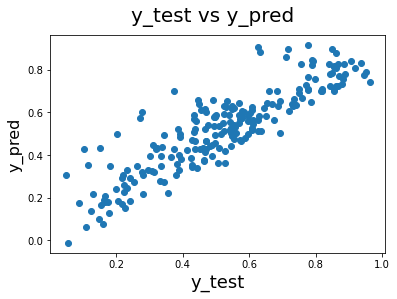

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- As the graph between test data and predicted data is linear it means model is giving the accurate prediction.

In [83]:
lm7.params

const        0.347738
Year         0.231075
holiday     -0.090534
temp         0.566444
Humidity    -0.314884
windspeed   -0.226738
winter       0.096727
Jan         -0.068836
Sept         0.074862
dtype: float64

### Finding Equation Of Best Fit Line

In [84]:
Cofficients = round(lm7.params,2)
Final = Cofficients.sort_values(ascending = False)
Final

temp         0.57
const        0.35
Year         0.23
winter       0.10
Sept         0.07
Jan         -0.07
holiday     -0.09
windspeed   -0.23
Humidity    -0.31
dtype: float64

In [85]:
for i in range(0, len(Final)):
    print(Final[i],'*',Final.index[i],end ='')
    print(' + ',end ='')

0.57 * temp + 0.35 * const + 0.23 * Year + 0.1 * winter + 0.07 * Sept + -0.07 * Jan + -0.09 * holiday + -0.23 * windspeed + -0.31 * Humidity + 

- We can see that the equation of our best fitted line is:
 - Cou𝑛𝑡=0.57 * temp + 0.35 * const + 0.23 * Year + 0.1 * winter + 0.07 * Sept -0.07 * Jan  -0.09 * holiday  -0.23 * windspeed  -0.31 * Humidity 

### Insights:
- Temperature is the Most Significant Feature which affects the Business positively.

- Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.
- All the positive coefficients like Year, temp, winter, sept indicate that an increase in these values will lead to an increase in the value of Count.
- All the negative coefficients such as holiday, windspeed , jan indicate that an increase in these values will lead to an decrease in the value of Count.

- The Demand of Bikes is more in the Winter season.

### Predictions:
- Company should focus on business expansion during month of September.
- In winter season the business could be expanded.


#### The top variables which are significant in our model are :

- Temp
- Year
- Winter
- Sep
- Jan
- Holiday
- Windspeed
- Humidity